<a href="https://colab.research.google.com/github/psyduck1203/ML-ProjectYard/blob/main/Bitcoin%20Price%20Predictor/Model/bitcoin_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omkar1203","key":"23de8fc6b7cb29d2b870bfd0af482859"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d mczielinski/bitcoin-historical-data

 86% 83.0M/96.1M [00:01<00:00, 60.5MB/s]
100% 96.1M/96.1M [00:01<00:00, 89.1MB/s]


In [7]:
!ls

bitcoin-historical-data.zip  kaggle.json  sample_data


In [12]:
import zipfile
zip_ref = zipfile.ZipFile('bitcoin-historical-data.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [13]:
# import the dataset
import pandas as pd
df = pd.read_csv('/content/files/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')

In [14]:
# import the libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [15]:
# encode the date
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [16]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [17]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [18]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
651/651 [==============================] - 2s 1ms/step - loss: 0.0818
Epoch 2/100
651/651 [==============================] - 1s 1ms/step - loss: 0.0296
Epoch 3/100
651/651 [==============================] - 1s 1ms/step - loss: 0.0144
Epoch 4/100
651/651 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 5/100
651/651 [==============================] - 1s 1ms/step - loss: 6.7437e-04
Epoch 6/100
651/651 [==============================] - 1s 1ms/step - loss: 1.3197e-04
Epoch 7/100
651/651 [==============================] - 1s 1ms/step - loss: 1.1055e-04
Epoch 8/100
651/651 [==============================] - 1s 1ms/step - loss: 1.3087e-04
Epoch 9/100
651/651 [==============================] - 1s 1ms/step - loss: 1.2668e-04
Epoch 10/100
651/651 [==============================] - 1s 1ms/step - loss: 1.1450e-04
Epoch 11/100
651/651 [==============================] - 1s 1ms/step - loss: 1.1911e-04
Epoch 12/100
651/651 [==============================] - 1s 1ms/step 

In [19]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

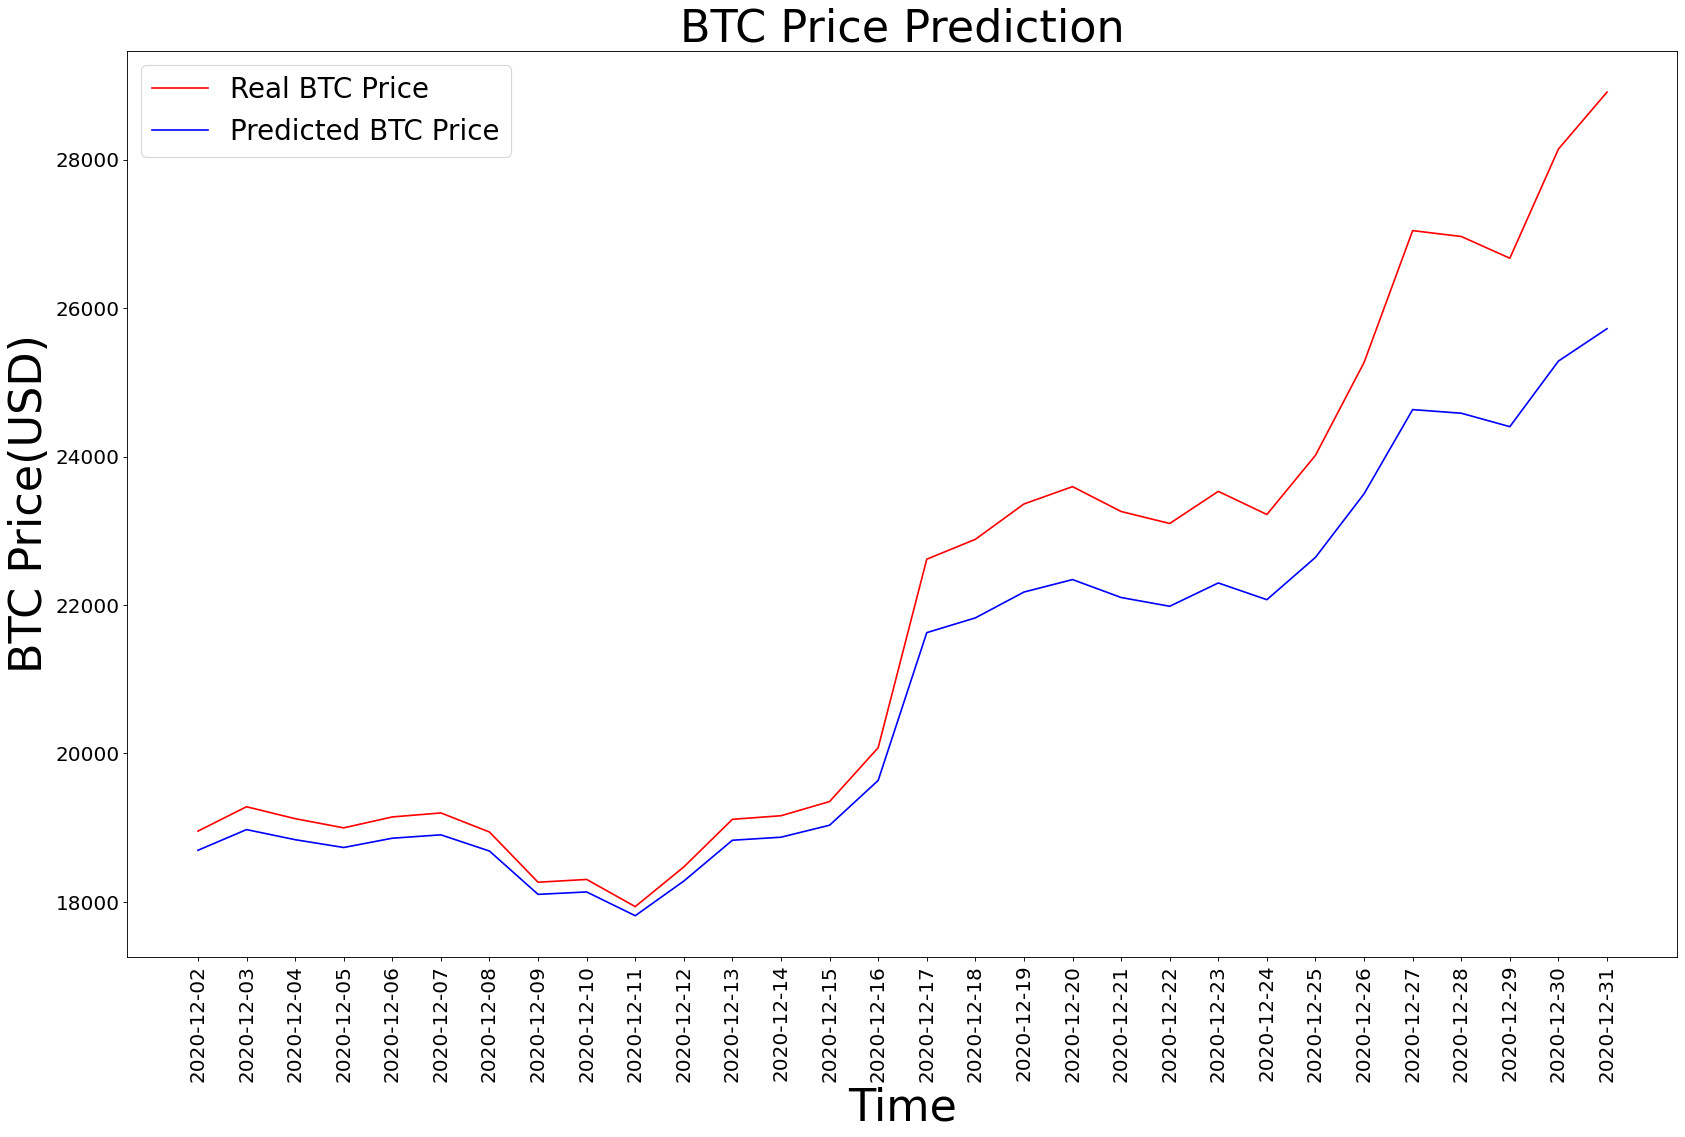

In [20]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [21]:
import pickle
Pkl_Filename = "bitcoinprice.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(sc, file)